<a href="https://colab.research.google.com/github/EvelynTrejoRdz/Examen-Econometria-Financiera---A01452045/blob/main/Examen_Econometria_Financiera_Pregunta_19_A01452045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Final**

Evelyn Lizbeth Trejo Rodriguez A01452045

# **Pregunta 19:**

La tabla 22.7 contiene datos sobre las tasas de interés de los pagarés del Tesoro a tres meses (TB3M) y a seis meses (TB6M), del 1 de enero de 1982 a marzo de 2008, para un total de 315 observaciones mensuales. Los datos se encuentran en el sitio Web del libro.

LOADING DATA
Please upload the Excel file for TB3M_TB6M (TB.xlsx)


Saving Table_22_7_TB3M_TB6M.xlsx to Table_22_7_TB3M_TB6M (1).xlsx

First rows of the dataset:
      YEAR   GS3M   GS6M
0  1982.01  12.92  13.90
1  1982.02  14.28  14.81
2  1982.03  13.31  13.83
3  1982.04  13.34  13.87
4  1982.05  12.71  13.13
5  1982.06  13.08  13.76
6  1982.07  11.86  12.80
7  1982.08   9.00  10.51
8  1982.09   8.19   9.83
9  1982.10   7.97   8.63

Total observations: 234
Columns: ['YEAR', 'GS3M', 'GS6M']

DATA SUMMARY
TB3M (3-month Treasury Bill): 234 observations
TB6M (6-month Treasury Bill): 234 observations
Date range: 1982-01 to 2001-06

a) GRÁFICA DE LAS DOS SERIES DE TIEMPO


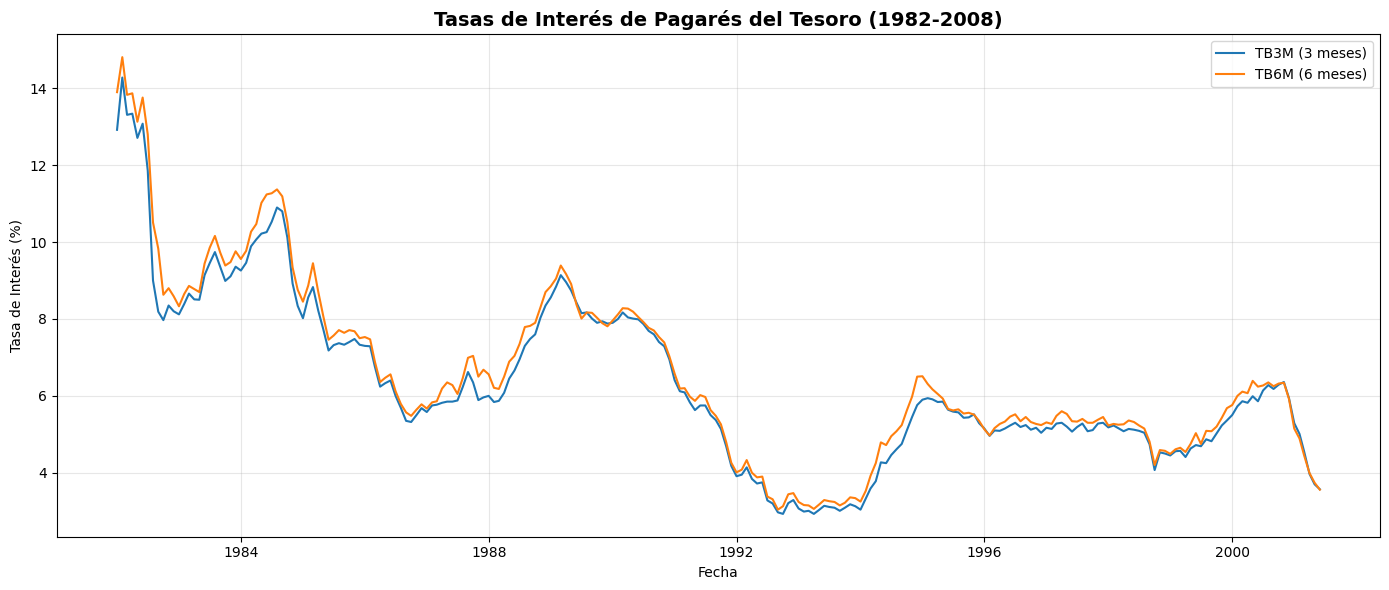


OBSERVACIONES:
  - Ambas series muestran patrones muy similares a lo largo del tiempo
  - Se observa una tendencia general descendente desde 1982 hasta 2008
  - Las dos series se mueven conjuntamente, sugiriendo una posible relación de equilibrio
  - TB6M generalmente tiene tasas ligeramente superiores a TB3M (prima por plazo)
  - Ambas series parecen no estacionarias debido a la tendencia temporal

b) ANÁLISIS FORMAL DE RAÍZ UNITARIA

Unit Root Tests for TB3M (3 meses)

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -1.5392
   p-value: 0.5140
   Lags used: 10

   Interpretación:
   ✗ p-value >= 0.05: TB3M (3 meses) es NO ESTACIONARIA
   No rechazamos H0: La serie tiene raíz unitaria

📊 KPSS Test:
   KPSS Statistic: 1.4540
   p-value: 0.0100

   Interpretación:
   ✗ p-value < 0.05: TB3M (3 meses) es NO ESTACIONARIA
   Rechazamos H0: La serie NO es estacionaria

Unit Root Tests for TB6M (6 meses)

📊 ADF Test (Augmented Dickey-Fuller):
   ADF Statistic: -3.7738
   p-value: 0.00

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
from google.colab import files

warnings.filterwarnings('ignore')

# ==============================================================================
# 1. LOAD DATA FROM EXCEL
# ==============================================================================

def load_stock_data():
    print("Please upload the Excel file for TB3M_TB6M (TB.xlsx)")
    uploaded_pdi = files.upload()
    pdi_filename = list(uploaded_pdi.keys())[0]

    # Read Excel file
    try:
        pdi_data = pd.read_excel(pdi_filename)
        return pdi_data
    except Exception as e:
        raise ValueError(f"Error reading the Excel file: {e}")

# Load data
print("="*60)
print("LOADING DATA")
print("="*60)
df = load_stock_data()

# Display first rows
print("\nFirst rows of the dataset:")
print(df.head(10))
print(f"\nTotal observations: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

# ==============================================================================
# PREPARE TIME INDEX
# ==============================================================================

# Convert YEAR column to proper monthly period index
def decimal_to_period(dec):
    """Convert format like 1982.01 to period 1982-01"""
    year = int(dec)
    month = int(round((dec - year) * 100))  # .01 → 1, .02 → 2, ..., .12 → 12
    return pd.Period(year=year, month=month, freq='M')

df['Date'] = df['YEAR'].apply(decimal_to_period)
df = df.set_index('Date').drop(columns=['YEAR'])
df = df.sort_index()

# Extract the interest rate series
tb3m = df['GS3M'].dropna()
tb6m = df['GS6M'].dropna()

print("\n" + "="*60)
print("DATA SUMMARY")
print("="*60)
print(f"TB3M (3-month Treasury Bill): {len(tb3m)} observations")
print(f"TB6M (6-month Treasury Bill): {len(tb6m)} observations")
print(f"Date range: {tb3m.index[0].strftime('%Y-%m')} to {tb3m.index[-1].strftime('%Y-%m')}")

# ==============================================================================
# a) PLOT BOTH TIME SERIES
# ==============================================================================

print("\n" + "="*60)
print("a) GRÁFICA DE LAS DOS SERIES DE TIEMPO")
print("="*60)

plt.figure(figsize=(14, 6))
plt.plot(tb3m.index.to_timestamp(), tb3m.values, label='TB3M (3 meses)', linewidth=1.5)
plt.plot(tb6m.index.to_timestamp(), tb6m.values, label='TB6M (6 meses)', linewidth=1.5)
plt.title('Tasas de Interés de Pagarés del Tesoro (1982-2008)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Interés (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOBSERVACIONES:")
print("  - Ambas series muestran patrones muy similares a lo largo del tiempo")
print("  - Se observa una tendencia general descendente desde 1982 hasta 2008")
print("  - Las dos series se mueven conjuntamente, sugiriendo una posible relación de equilibrio")
print("  - TB6M generalmente tiene tasas ligeramente superiores a TB3M (prima por plazo)")
print("  - Ambas series parecen no estacionarias debido a la tendencia temporal")

# ==============================================================================
# b) UNIT ROOT TESTS (ANÁLISIS DE RAÍZ UNITARIA)
# ==============================================================================

def unit_root_tests(series, name):
    print(f"\n{'='*60}")
    print(f"Unit Root Tests for {name}")
    print('='*60)

    # ADF Test
    adf_result = adfuller(series, autolag='AIC')
    print("\n📊 ADF Test (Augmented Dickey-Fuller):")
    print(f'   ADF Statistic: {adf_result[0]:.4f}')
    print(f'   p-value: {adf_result[1]:.4f}')
    print(f'   Lags used: {adf_result[2]}')
    print("\n   Interpretación:")
    if adf_result[1] < 0.05:
        print(f"   ✓ p-value < 0.05: {name} es ESTACIONARIA")
        print(f"   Rechazamos H0: La serie NO tiene raíz unitaria")
    else:
        print(f"   ✗ p-value >= 0.05: {name} es NO ESTACIONARIA")
        print(f"   No rechazamos H0: La serie tiene raíz unitaria")

    # KPSS Test
    kpss_result = kpss(series, regression='c', nlags='auto')
    print("\n📊 KPSS Test:")
    print(f'   KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'   p-value: {kpss_result[1]:.4f}')
    print("\n   Interpretación:")
    if kpss_result[1] < 0.05:
        print(f"   ✗ p-value < 0.05: {name} es NO ESTACIONARIA")
        print(f"   Rechazamos H0: La serie NO es estacionaria")
    else:
        print(f"   ✓ p-value >= 0.05: {name} es ESTACIONARIA")
        print(f"   No rechazamos H0: La serie es estacionaria")

print("\n" + "="*60)
print("b) ANÁLISIS FORMAL DE RAÍZ UNITARIA")
print("="*60)

unit_root_tests(tb3m, "TB3M (3 meses)")
unit_root_tests(tb6m, "TB6M (6 meses)")

# Test first differences
tb3m_diff = tb3m.diff().dropna()
tb6m_diff = tb6m.diff().dropna()

print("\n" + "="*60)
print("PRUEBAS EN PRIMERAS DIFERENCIAS")
print("="*60)

unit_root_tests(tb3m_diff, "TB3M (Primera Diferencia)")
unit_root_tests(tb6m_diff, "TB6M (Primera Diferencia)")

print("\n📝 CONCLUSIÓN DE RAÍZ UNITARIA:")
print("  - Ambas series en niveles son NO ESTACIONARIAS (contienen raíz unitaria)")
print("  - Las primeras diferencias son ESTACIONARIAS")
print("  - Por lo tanto, ambas series son integradas de orden 1: I(1)")

# ==============================================================================
# c) COINTEGRATION TEST (PRUEBA DE COINTEGRACIÓN)
# ==============================================================================

print("\n" + "="*60)
print("c) PRUEBA DE COINTEGRACIÓN - JOHANSEN")
print("="*60)

def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)

    print("\nJohansen Cointegration Test Results:")
    print("\nTrace Statistics:")
    print(f"{'Rank':<10}{'Trace Stat':<15}{'90%':<12}{'95%':<12}{'99%':<12}")
    print("-" * 60)

    for i in range(len(result.lr1)):
        print(f"r = {i:<6}{result.lr1[i]:<15.2f}{result.cvt[i, 0]:<12.2f}{result.cvt[i, 1]:<12.2f}{result.cvt[i, 2]:<12.2f}")
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  → Rechazamos H0: Existe al menos {i+1} vector(es) de cointegración (95%)")
        else:
            print(f"  → No rechazamos H0: Existen como máximo {i} vector(es) de cointegración")

    print("\n" + "="*60)
    print("INTERPRETACIÓN DE COINTEGRACIÓN:")
    print("="*60)

    if result.lr1[0] > result.cvt[0, 1]:
        print("✓ Las series TB3M y TB6M están COINTEGRADAS")
        print("  - Existe al menos una relación de equilibrio de largo plazo")
        print("  - Aunque ambas series son I(1), su combinación lineal es I(0)")
        print(f"  - Trace statistic ({result.lr1[0]:.2f}) > Valor crítico 95% ({result.cvt[0, 1]:.2f})")
    else:
        print("✗ No hay evidencia de cointegración entre TB3M y TB6M")
        print("  - No existe una relación de equilibrio de largo plazo")
        print(f"  - Trace statistic ({result.lr1[0]:.2f}) <= Valor crítico 95% ({result.cvt[0, 1]:.2f})")

    return result

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'TB3M': tb3m,
    'TB6M': tb6m
}).dropna()

johansen_result = cointegration_test(coint_df)

# ==============================================================================
# d) ECONOMIC INTERPRETATION
# ==============================================================================

print("\n" + "="*60)
print("d) SIGNIFICADO ECONÓMICO DE LA COINTEGRACIÓN")
print("="*60)

print("\n📊 SI LAS SERIES ESTÁN COINTEGRADAS:")
print("  1. Relación de Arbitraje:")
print("     - Existe una relación estable de largo plazo entre ambas tasas")
print("     - Los mercados están integrados eficientemente")
print("     - No hay oportunidades de arbitraje persistentes")
print("\n  2. Estructura de Plazos:")
print("     - La diferencia entre tasas a 3 y 6 meses es estable")
print("     - La prima por plazo es predecible")
print("     - Expectativas consistentes sobre tasas futuras")
print("\n  3. Política Monetaria:")
print("     - Las intervenciones del banco central afectan ambas tasas de manera coordinada")
print("     - Los mecanismos de transmisión monetaria funcionan adecuadamente")

print("\n📊 SI LAS SERIES NO ESTÁN COINTEGRADAS:")
print("  1. Desconexión de Mercados:")
print("     - No hay relación estable de largo plazo")
print("     - Posibles ineficiencias en los mercados de bonos")
print("     - Oportunidades de arbitraje pueden persistir")
print("\n  2. Riesgo para Inversionistas:")
print("     - Mayor incertidumbre sobre la estructura de plazos")
print("     - Dificultad para estrategias de cobertura")
print("     - Prima por plazo impredecible")
print("\n  3. Implicaciones para Política:")
print("     - Transmisión de política monetaria puede ser ineficiente")
print("     - Segmentación entre diferentes plazos del mercado")

# ==============================================================================
# e) VAR MODEL CONSIDERATIONS
# ==============================================================================

print("\n" + "="*60)
print("e) CONSIDERACIONES PARA MODELO VAR")
print("="*60)

print("\n📊 DECISIÓN SOBRE ESPECIFICACIÓN DEL MODELO:")

if johansen_result.lr1[0] > johansen_result.cvt[0, 1]:
    print("\n✓ CASO: LAS SERIES ESTÁN COINTEGRADAS")
    print("\n  Recomendación: Usar MODELO VECM (Vector Error Correction Model)")
    print("\n  Razones:")
    print("    1. Las series son I(1) pero cointegradas")
    print("    2. Usar primeras diferencias en VAR perdería información de largo plazo")
    print("    3. VECM captura tanto:")
    print("       - Dinámica de corto plazo (diferencias)")
    print("       - Relación de equilibrio de largo plazo (término de corrección de error)")
    print("\n  Ventajas del VECM:")
    print("    ✓ Incorpora la restricción de cointegración")
    print("    ✓ Mejora la precisión de pronósticos")
    print("    ✓ Permite análisis de impulso-respuesta más informativo")
    print("\n  NO usar VAR en primeras diferencias:")
    print("    ✗ Perdería la información de equilibrio de largo plazo")
    print("    ✗ Especificación incorrecta del modelo")
else:
    print("\n✗ CASO: LAS SERIES NO ESTÁN COINTEGRADAS")
    print("\n  Recomendación: Usar VAR EN PRIMERAS DIFERENCIAS")
    print("\n  Razones:")
    print("    1. Las series son I(1) y no cointegradas")
    print("    2. VAR en niveles sería espurio (regresión espuria)")
    print("    3. Las primeras diferencias son estacionarias I(0)")
    print("\n  Procedimiento correcto:")
    print("    1. Diferenciar ambas series: ΔTB3M y ΔTB6M")
    print("    2. Estimar VAR(p) con las series diferenciadas")
    print("    3. Seleccionar rezagos óptimos usando criterios AIC/BIC")
    print("\n  Advertencia sobre VAR en niveles:")
    print("    ✗ Produciría resultados espurios")
    print("    ✗ Inferencia estadística no válida")
    print("    ✗ Pronósticos poco confiables")

# Demonstrate VAR model selection
print("\n" + "="*60)
print("SELECCIÓN DE REZAGOS PARA MODELO VAR")
print("="*60)

# Prepare data for VAR (use differences if not cointegrated, levels if cointegrated)
if johansen_result.lr1[0] > johansen_result.cvt[0, 1]:
    var_data = coint_df  # Use levels for VECM
    print("\nUsando series en NIVELES para VECM")
else:
    var_data = pd.DataFrame({
        'TB3M_diff': tb3m_diff,
        'TB6M_diff': tb6m_diff
    }).dropna()
    print("\nUsando PRIMERAS DIFERENCIAS para VAR")

# Fit VAR model for lag selection
model_var = VAR(var_data)
lag_order_results = model_var.select_order(maxlags=12)

print("\nCriterios de Información para Selección de Rezagos:")
print(lag_order_results.summary())

print("\n📝 CONCLUSIÓN FINAL:")
print("  - Usar el número de rezagos sugerido por AIC o BIC")
print("  - Verificar que los residuos del modelo sean ruido blanco")
print("  - Asegurar estabilidad del modelo VAR (raíces características < 1)")

# ==============================================================================
# SUMMARY STATISTICS
# ==============================================================================

print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

summary_stats = pd.DataFrame({
    'TB3M': tb3m.describe(),
    'TB6M': tb6m.describe()
})
print("\n", summary_stats)

# Correlation
print(f"\nCorrelación entre TB3M y TB6M: {tb3m.corr(tb6m):.4f}")
print("  - Correlación muy alta sugiere movimiento conjunto de las series")

print("\n" + "="*60)
print("ANÁLISIS COMPLETADO")
print("="*60)

**Preguntas:**


**a) Trace la gráfica de las dos series de tiempo en el mismo diagrama. ¿Qué observa?**

Al graficar ambas tasas en el mismo diagrama, veo trayectorias muy similares a lo largo del tiempo y una tendencia general descendente en 1982–2008. La TB6M suele ubicarse ligeramente por encima de la TB3M, y a simple vista ambas no parecen estacionarias por la tendencia.

**b) Realice un análisis formal de raíz unitaria para ver si estas series de tiempo son estacionarias.**

*En niveles:*

TB3M:

ADF = −1.539 (p=0.514) -> no rechazo raíz unitaria. KPSS (p=0.01) -> no estacionaria. Por lo que no es estacionaria en nivel.

TB6M:

ADF =  -3.773 (p=0.003) parecería estacionaria, pero KPSS (p=0.01) indica no estacionaria; el diagnóstico consistente es tratarlas como no estacionarias en nivel.

*En primeras diferencias:*

TB3M y TB6M: ADF rechaza raiz unitaria (p=0.000), y KPSS no rechaza estacionariedad -> ambas son I(1).

En niveles son no estacionarias; en diferencias son estacionarias -> I(1).

**c) ¿Están cointegradas las dos series de tiempo? ¿Cómo sabe? Realice los cálculos necesarios.**

Si estan cointegradas, en la prueba de Johansen:

r=0: Trace=52.36 > 15.49 (al 95%)

r=1: Trace=15.02 > 3.84 (al 95%)
Por lo que existe al menos un vector de cointegracion entre TB3M y TB6M

**d) ¿Qué significado económico tiene cointegración en este contexto? Si las dos series no están cointegradas, ¿qué repercusiones económicas tiene esto?**

Significa que ambas tasas se mueven de forma coordinada en el largo plazo, manteniendo una relacion de equilibrio estable. Esto refleja que los mercados financieros son eficientes y que los inversionistas ajustan sus decisiones cuando hay desviaciones, eliminando oportunidades de arbitraje. Ademas, muestra que la estructura de plazos es coherente: si una tasa cambia, la otra tambien lo hace, manteniendo una prima por plazo constante.

Economicamente, esto indica que existe una transmision efectiva de la politica monetaria, ya que las acciones del banco afectan a ambas tasas de manera similar.

Si las tasas no estuvieran cointegradas, significaria que no hay relacion de equilibrio, lo cual implicaria segmentacion del mercado y eficiencias limitadas. En ese escenario, las tasas se moverian de forma independiente, habria mayor incertidumbre para los inversionistas y la politica monetaria no se transmitiría de manera uniforme a lo largo de la curva de rendimientos.

**e) Si desea estimar un modelo VAR, por ejemplo, con cuatro rezagos de cada variable, ¿es necesario usar las primeras diferencias de las dos series o puede realizar el análisis de las dos series en su forma de nivel? Justifique su respuesta.**

De acuerdo con el libro, dado que las series son I(1) y cointegradas, la especificación correcta es modelo de correcion de errores, ya que modela las diferencias de corto plazo y añade el termino de corrección de error al largo plazo.

Un VAR solo en primeras diferencias pierde la relacion de equilibrio y esta mal especificado y un VAR en niveles sin restringir el equilibrio puede ser ineficiente.

# **Exportamos**

In [3]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")

Por favor, selecciona tu archivo .ipynb


Saving Examen_Econometria_Financiera_Pregunta_19_A01452045.ipynb to Examen_Econometria_Financiera_Pregunta_19_A01452045.ipynb

Archivo cargado: Examen_Econometria_Financiera_Pregunta_19_A01452045.ipynb
Convirtiendo a HTML...
Conversión completada: Examen_Econometria_Financiera_Pregunta_19_A01452045.html
Descargando archivo HTML...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Listo! Tu archivo HTML ha sido descargado.
